# K-Means Clustering for Sections

In [121]:
import re
import glob
import string

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.externals import joblib

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

In [122]:
list_of_dfs = []

for f in glob.glob('sections/*.csv'):
    list_of_dfs.append(pd.read_csv(f, encoding='utf-8-sig'))

In [123]:
list_of_dfs[0]

,country,iso,gdp,population,year,tariff_f,duty_f,quota_f,voluntary_restraint_f,subsidy_f,...,copyright_lf,countervailing_lf,unfair_lf,fair_trade_lf,trade_facilitation_lf,section_number,section_name,words,paragraphs,text
0,guyana,GUY,3.446266e+09,773303.0,2015,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,132,4,"['3.2.1 Export documentation and procedures',..."
1,hong_kong_china,HKG,3.210000e+11,7346700.0,2014,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,203,2,"['3.3.1 Export documents and procedures', '3...."


In [124]:
#doc list with section tag
section_text = []
section_names = []

translator = str.maketrans('', '', string.punctuation)

for df in list_of_dfs:
    text = ' '.join(list(df['text'].values))
    
    s = re.sub(r'\d+', '', text)
    ns = s.translate(translator)
    
    section_text.append(' '.join(ns.split()).lower())
    section_names.append(df['section_name'].values[0])

In [125]:
print((section_names[0], section_text[0]))

('export documentation and procedures', 'export documentation and procedures procedures applied to exports are similar to those applied to imports exporters must register with the gra predeparture declarations for exports must be submitted to the gra with the operation of the risk management unit in not all exports are subject to physical inspection except exports to the united states and the united kingdom the presence of a customs officer at exporters premises when containers are loaded is no longer necessary export containers are subject to scanning based on risk profiling when necessary physical inspections are conducted on consignments that are deemed to have high risks implementations of risk profiling have reportedly reduced inspections of shipments there are some additional measures applied to exports of forestry products section there are also facilitation measures provided for exports of perishable goods export documents and procedures an export declaration must be lodged ele

In [126]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text)

In [127]:
tfidf_matrix.shape

(254, 23969)

In [128]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ -2.22044605e-16,   6.78987591e-01,   6.31104700e-01, ...,
          6.43775253e-01,   7.15299864e-01,   6.21476217e-01],
       [  6.78987591e-01,   0.00000000e+00,   6.35851126e-01, ...,
          5.71018456e-01,   6.70875728e-01,   5.38523141e-01],
       [  6.31104700e-01,   6.35851126e-01,  -2.22044605e-16, ...,
          5.60234044e-01,   7.14616340e-01,   6.30806583e-01],
       ..., 
       [  6.43775253e-01,   5.71018456e-01,   5.60234044e-01, ...,
          1.11022302e-16,   6.41397524e-01,   5.46563524e-01],
       [  7.15299864e-01,   6.70875728e-01,   7.14616340e-01, ...,
          6.41397524e-01,  -2.22044605e-16,   6.50818362e-01],
       [  6.21476217e-01,   5.38523141e-01,   6.30806583e-01, ...,
          5.46563524e-01,   6.50818362e-01,  -2.22044605e-16]])

>Change "num_clusters" below to designated number.

In [326]:
num_clusters = 25

km = KMeans(n_clusters=num_clusters, random_state=2)
#km = GaussianMixture(n_components=1)

%time km.fit(tfidf_matrix.toarray())

CPU times: user 8.35 s, sys: 633 ms, total: 8.98 s
Wall time: 7.67 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [327]:
clusters = km.labels_.tolist()

In [328]:
sections_dict = {'section_names' : section_names, 'clusters' : clusters}
df = pd.DataFrame(sections_dict, index=[i for i in range(len(clusters))], columns=['section_names', 'clusters'])

In [329]:
df

,section_names,clusters
0,export documentation and procedures,3
1,other charges,12
2,export incentives,24
3,registration customs documents and procedures,3
4,customs procedures and valuation,3
5,export prohibitions authorizations and licensing,13
6,export subsidies promotion and assistance,24
7,prohibitions licensing and controls,13
8,tariffs and other charges affecting imports,12
9,export duty drawback,7


In [330]:
#Note: line directly below is used in visualization only
cluster_samples = {}

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

c_counter = 0
names = list(df['section_names'].values)
clus = list(df['clusters'].values)

with open('25_cluster.txt', 'w') as f:
    for i in range(num_clusters):
        print("Cluster %d:" % i, end='')
        f.write("Cluster %d:" % i)
    
        s_list = []
    
        for c in range(len(clus)):
            if clus[c] == i:
                print(' %s,' % names[c], end='')
                f.write(' %s,' % names[c])
                s_list.append(names[c])
        
        cluster_samples[c_counter] = s_list[:3]
        c_counter+=1
            
        print('\n')
        f.write('\n\n')
        
f.close()

Cluster 0: customs valuation, customs valuation and pre-shipment inspection,

Cluster 1: marking labelling and packaging, labelling and marking, packaging marking and labelling requirements, labelling and packaging requirements, requirements with regard to packaging marking and labelling,

Cluster 2: competition policy state aid consumer protection and price controls, competition policy, competition policy consumer protection and price controls, competition and price control, competition and consumer policy, competition policy and regulatory issues, consumer policy and protection, competition policy state aid and price controls,

Cluster 3: export documentation and procedures, registration customs documents and procedures, customs procedures and valuation, duties and taxes, customs procedures valuation and requirements, preshipment inspection, export prohibitions restrictions and controls, customs procedures and regulations, goods in transit, transit, procedures and documentation, regi

In [331]:
cluster_samples

{0: ['customs valuation', 'customs valuation and pre-shipment inspection'],
 1: ['marking labelling and packaging',
  'labelling and marking',
  'packaging marking and labelling requirements'],
 2: ['competition policy state aid consumer protection and price controls',
  'competition policy',
  'competition policy consumer protection and price controls'],
 3: ['export documentation and procedures',
  'registration customs documents and procedures',
  'customs procedures and valuation'],
 4: ['export subsidies and duty and tax concessions',
  'tariff quotas',
  'tariff and tax concessions'],
 5: ['other taxes and charges'],
 6: ['tariffs', 'ordinary customs duties', 'tariff schedule'],
 7: ['export duty drawback',
  'export procedures taxes and restrictions',
  'export procedures taxes and levies'],
 8: ['technical regulations and standards',
  'standards technical requirements and conformity assessment',
  'standards technical regulations and accreditation'],
 9: ['import licensing quo

# Visualization

>**NOTE:** We only have 25 colors -- add more if # clusters > 25.

In [332]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
points = pca.fit_transform(dist)

xs, ys = points[:, 0], points[:, 1]

In [335]:
possible_colors = ['#FA5858', '#B40404', '#610B0B', '#FAAC58', '#DF7401', '#FFFF00',
                   '#AEB404', '#BFFF00', '#86B404', '#80FF00', '#58FAF4', '#086A87',
                   '#2E64FE', '#0404B4', '#8258FA', '#4B088A', '#FF00FF', '#B4045F',
                   '#FA58D0', '#A4A4A4', '#000000', '#886A08', '#A9F5BC', '#F5A9A9',
                   '#E0E6F8']
 
#names are the dict from above: cluster_samples
cluster_colors = {}

prev_picks = []
counter = 0
while len(cluster_colors) < num_clusters:
    pick_random = random.randint(a=0, b=len(possible_colors)-1)
    if pick_random not in prev_picks:
        cluster_colors[counter] = possible_colors[pick_random]
        prev_picks.append(pick_random)
        counter += 1

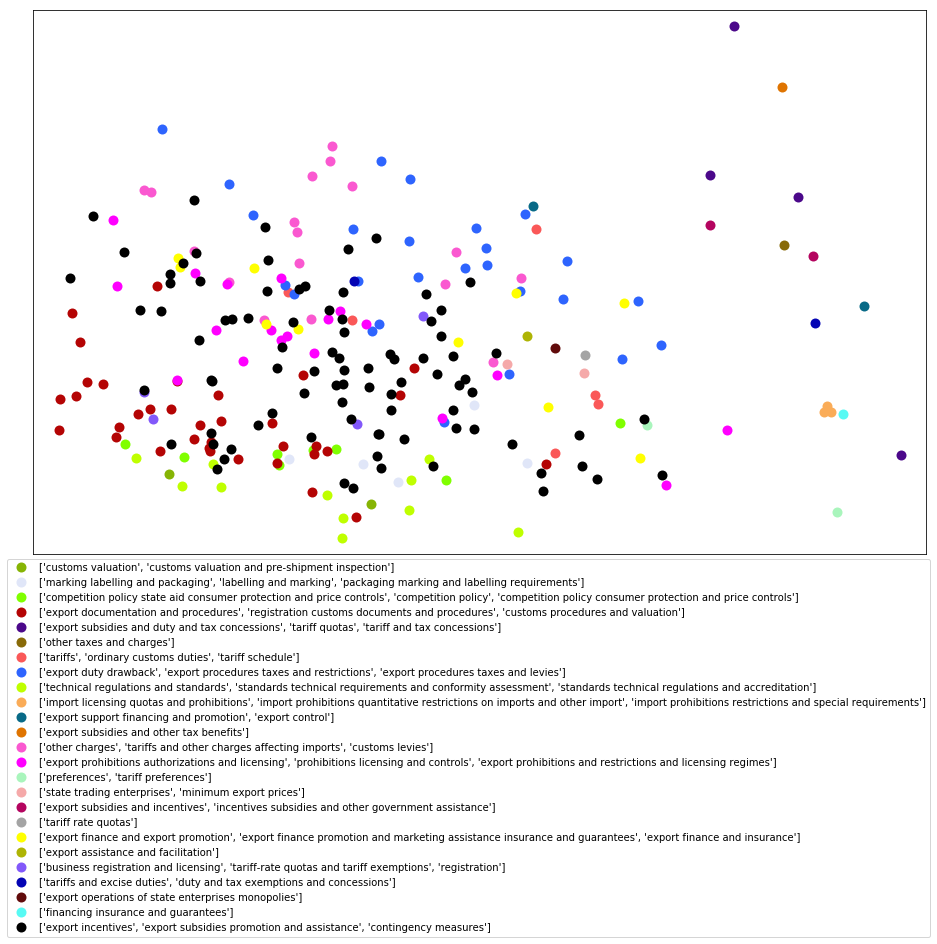

In [336]:
%matplotlib inline 
df_vals = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=section_names)) 
groups = df_vals.groupby('label')

fig, ax = plt.subplots(figsize=(16, 10))
ax.margins(0.03)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_samples[name], color=cluster_colors[name], mec='none')
    
    ax.set_aspect('auto')
    ax.tick_params(bottom='off', top='off', labelbottom='off')
    ax.tick_params(left='off', top='off', labelleft='off')
    
plt.legend(bbox_to_anchor=(1.01, 0))

plt.savefig('25_cluster.png', bbox_inches='tight')
    
plt.show()